In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

print(train_input.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


In [2]:
train_scaled_pre = (train_input/255.0).reshape(-1, 28, 28, 1)
print(train_scaled_pre.shape)

(60000, 28, 28, 1)


In [3]:
train_scaled, val_scaled, train_target, val_target = \
train_test_split(train_scaled_pre, train_target,
                test_size = 0.2, random_state = 1)

print(train_scaled.shape)
print(val_scaled.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)


In [10]:
# First convolution layers
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters = 32, kernel_size = 3, 
                              activation='relu', padding = 'same', # zero padding
                              strides= 1, input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPool2D(pool_size=2))

model.add(keras.layers.Conv2D(filters= 64, kernel_size = 3,
                              activation = 'relu', padding = 'same',
                              strides= 1, input_shape=(28, 28, 1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 100)               1254500   
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                      

In [11]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

In [12]:
modelpath = "./model/{epoch:02d}={val_loss:.4f}.hdf5"
checkpointer = keras.callbacks.ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [14]:
history = model.fit(train_scaled, train_target, validation_data = (val_scaled, val_target), epochs=10, batch_size=50, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/10
960/960 [==============================] - ETA: 0s - loss: 0.4104 - accuracy: 0.8533
Epoch 1: val_loss improved from inf to 0.31095, saving model to ./model/01=0.3109.hdf5
960/960 [==============================] - 73s 75ms/step - loss: 0.4104 - accuracy: 0.8533 - val_loss: 0.3109 - val_accuracy: 0.8885
Epoch 2/10
960/960 [==============================] - ETA: 0s - loss: 0.2670 - accuracy: 0.9032
Epoch 2: val_loss improved from 0.31095 to 0.25272, saving model to ./model/02=0.2527.hdf5
960/960 [==============================] - 69s 72ms/step - loss: 0.2670 - accuracy: 0.9032 - val_loss: 0.2527 - val_accuracy: 0.9070
Epoch 3/10
960/960 [==============================] - ETA: 0s - loss: 0.2141 - accuracy: 0.9219
Epoch 3: val_loss improved from 0.25272 to 0.23236, saving model to ./model/03=0.2324.hdf5
960/960 [==============================] - 69s 72ms/step - loss: 0.2141 - accuracy: 0.9219 - val_loss: 0.2324 - val_accuracy: 0.9155
Epoch 4/10
960/960 [========================

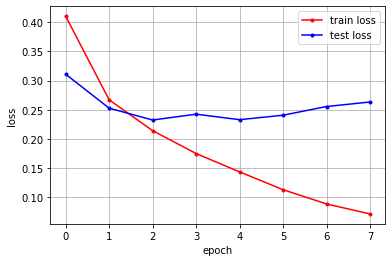

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], marker = '.', c = 'r', label="train loss")
plt.plot(history.history['val_loss'], marker = '.', c='b', label='test loss')
plt.legend(loc="upper right")
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [16]:
!pip install pydot
!pip install graphviz


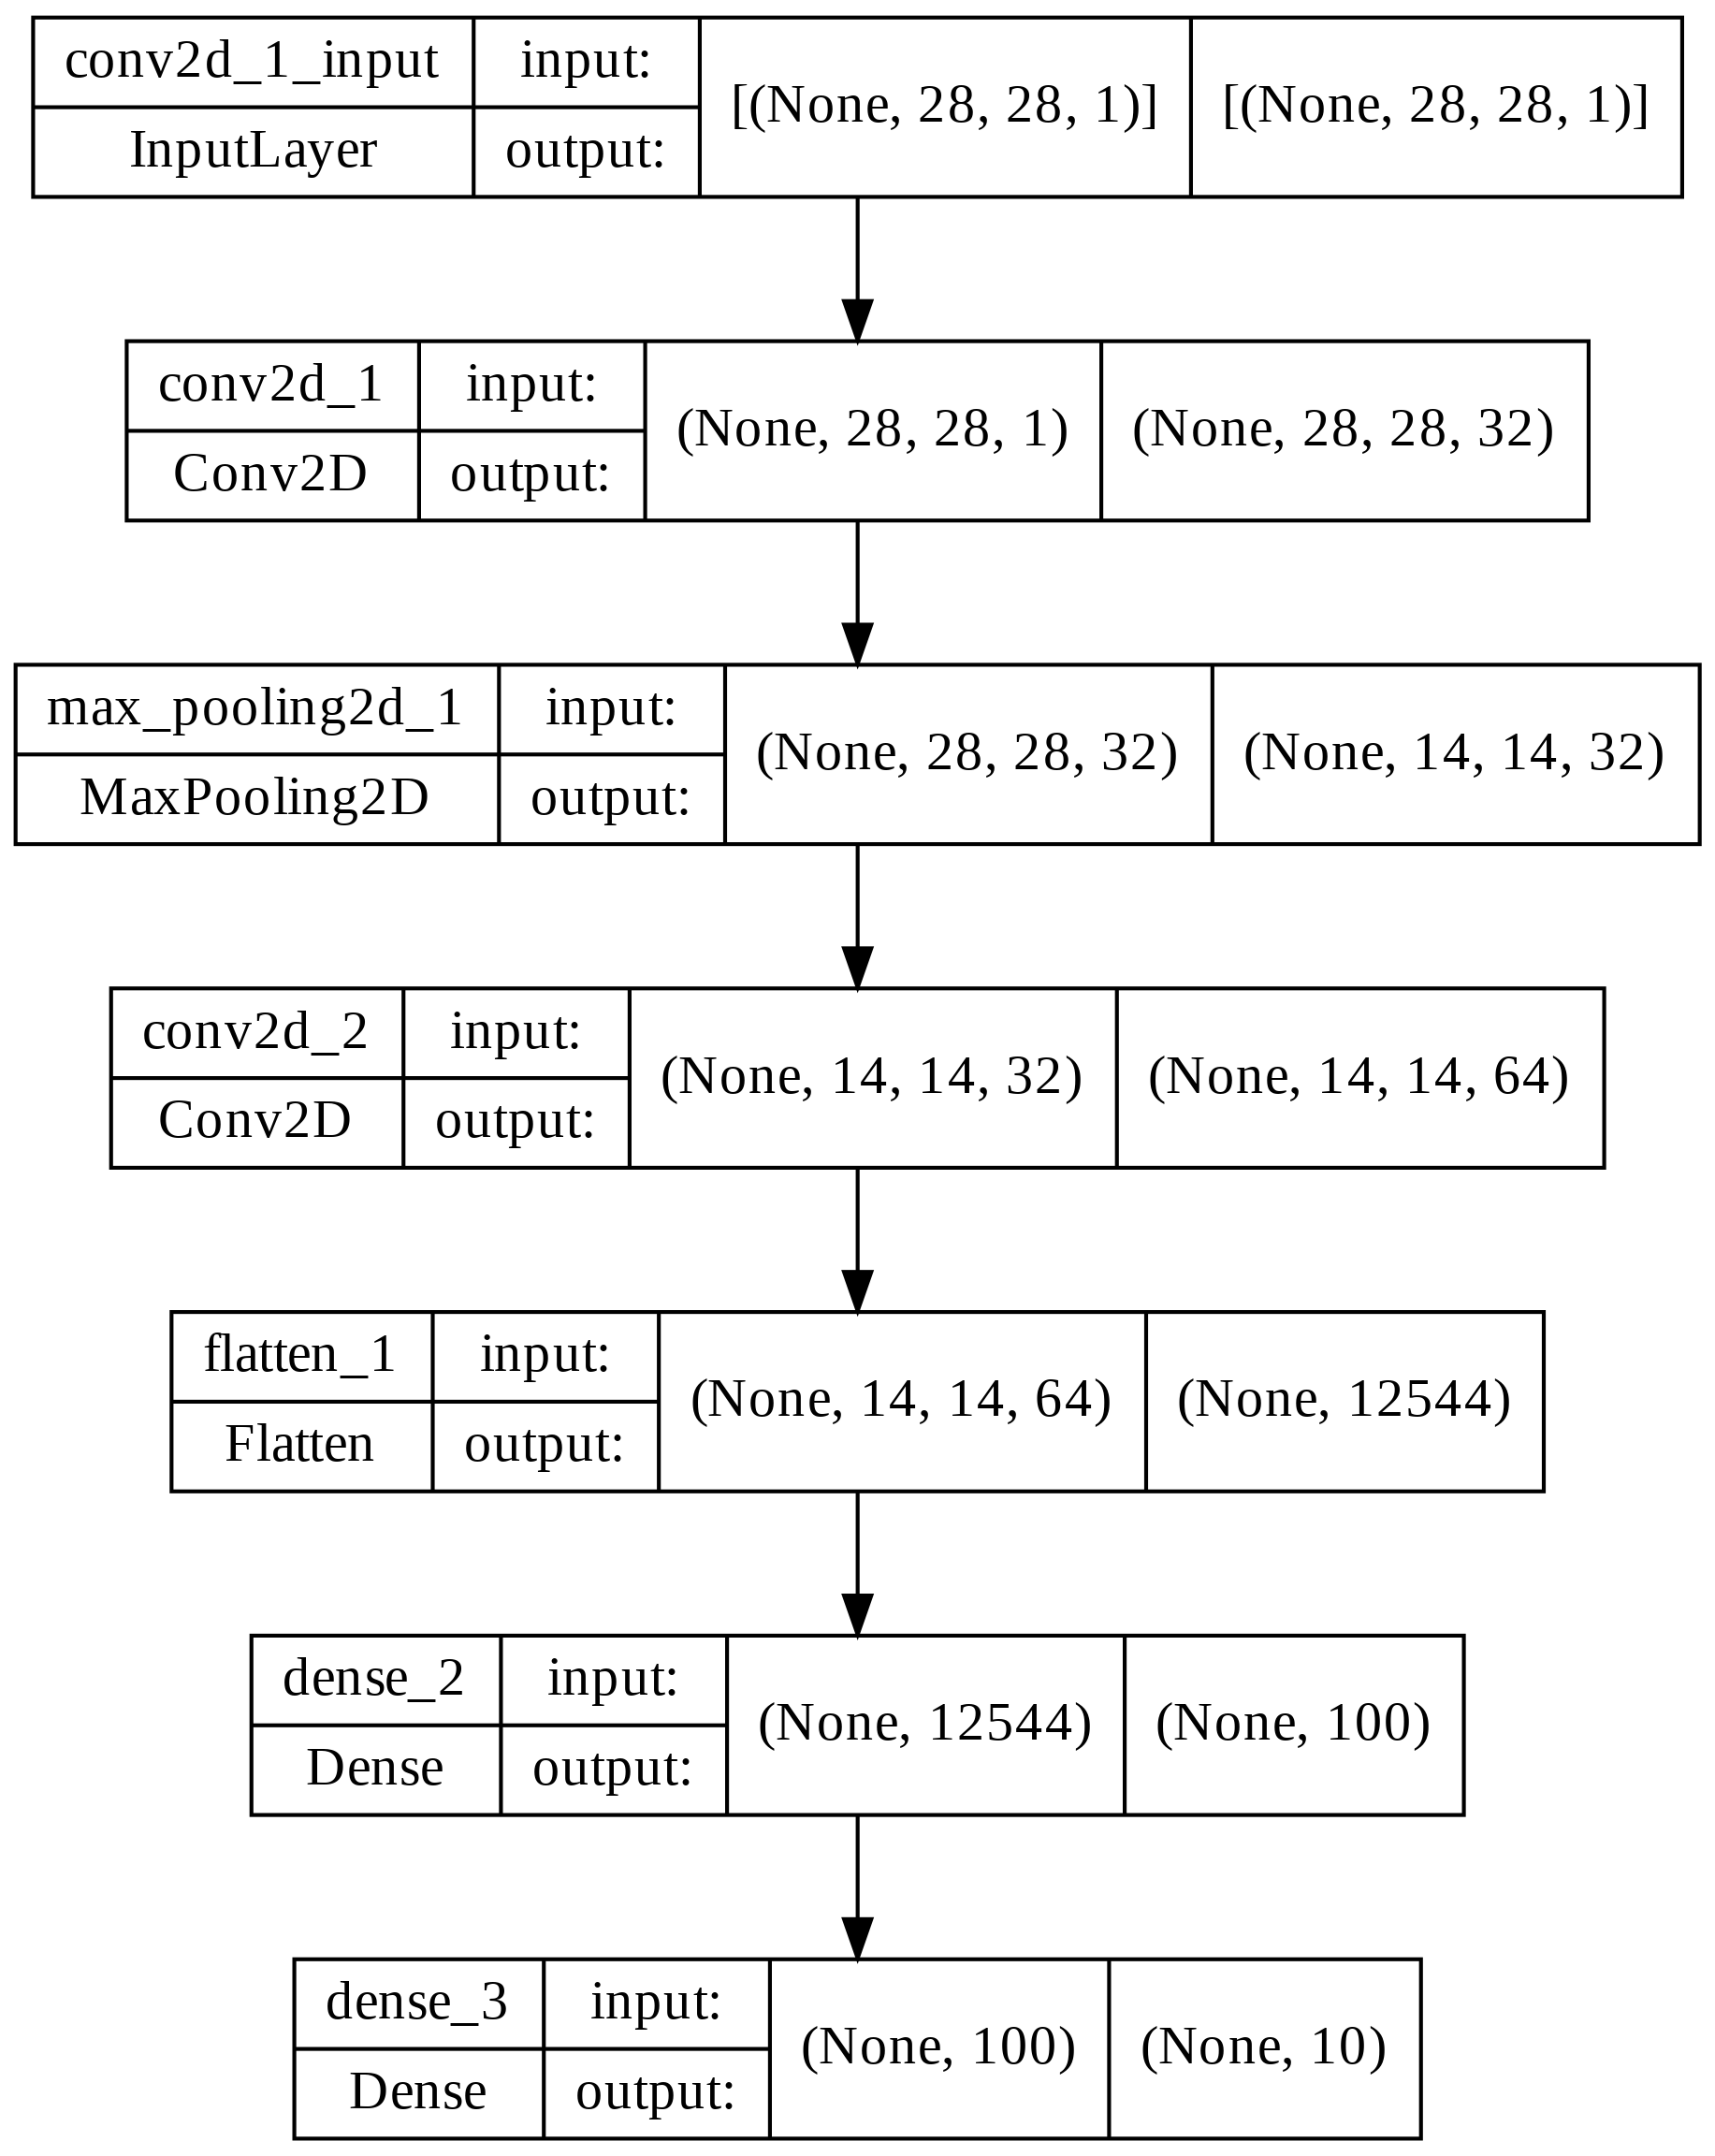

In [18]:
keras.utils.plot_model(model, show_shapes=True, to_file = 'cnn.png', dpi = 300)